#### Author: Chong Xiao Ying
##### Tutorial Group: GP05

In [ ]:
# Import necessary libraries, packages and modules
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Keras imports 
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, BatchNormalization, MaxPooling2D, 
                                     Flatten, Dense, Dropout)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.utils.vis_utils import plot_model

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Path location of training, validation and test data
train_path = "/home/yucong/Documents/Data/train"
train_path_cat = "/home/yucong/Documents/Data/train/cat"
train_path_dog = "/home/yucong/Documents/Data/train/dog"

val_path = "/home/yucong/Documents/Data/val"
val_path_cat = "/home/yucong/Documents/Data/val/cat"
val_path_dog = "/home/yucong/Documents/Data/val/dog"

test_path = "/home/yucong/Documents/Data/test" 

In [ ]:
# Defining the image height, image width, number of channels and batch size
IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS, BATCH_SIZE = 150, 150, 3, 32

### Obtaining train and validation dataset for classifier 

In [ ]:
# Performing image augmentation on training dataset
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.1, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')


val_datagen = ImageDataGenerator(rescale=1.0/255)

train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),# resize images to this size
                                                  batch_size = BATCH_SIZE,
                                                  class_mode = 'binary')

val_dataset = val_datagen.flow_from_directory(val_path,
                                              target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),# resize images to this size
                                              batch_size = BATCH_SIZE,
                                              class_mode = 'binary')

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


### Building and training classifier

In [ ]:
def build_model():
    
    inp = Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS))

    x = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='SAME')(inp)
    x = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='SAME')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='SAME')(x)
    x = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='SAME')(x)
    x = MaxPooling2D()(x)
    x = Dropout(0.20)(x)

    x = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='SAME')(x)
    x = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='SAME')(x)
    x = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='SAME')(x)
    x = MaxPooling2D()(x)
    x = Dropout(0.20)(x)

    x = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='SAME')(x)
    x = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='SAME')(x)
    x = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='SAME')(x)
    x = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='SAME')(x)
    x = MaxPooling2D()(x)
    x = Dropout(0.20)(x)

    x = Flatten()(x)
    x = Dropout(0.20)(x)

    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.20)(x)

    out = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inp, outputs=out)

    opt = Adam(learning_rate=0.0003, decay=1e-4)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model_cnn = build_model()
print(model_cnn.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0     

2021-11-11 12:52:30.295309: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-11 12:52:30.300051: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-11 12:52:30.300517: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-11 12:52:30.301121: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

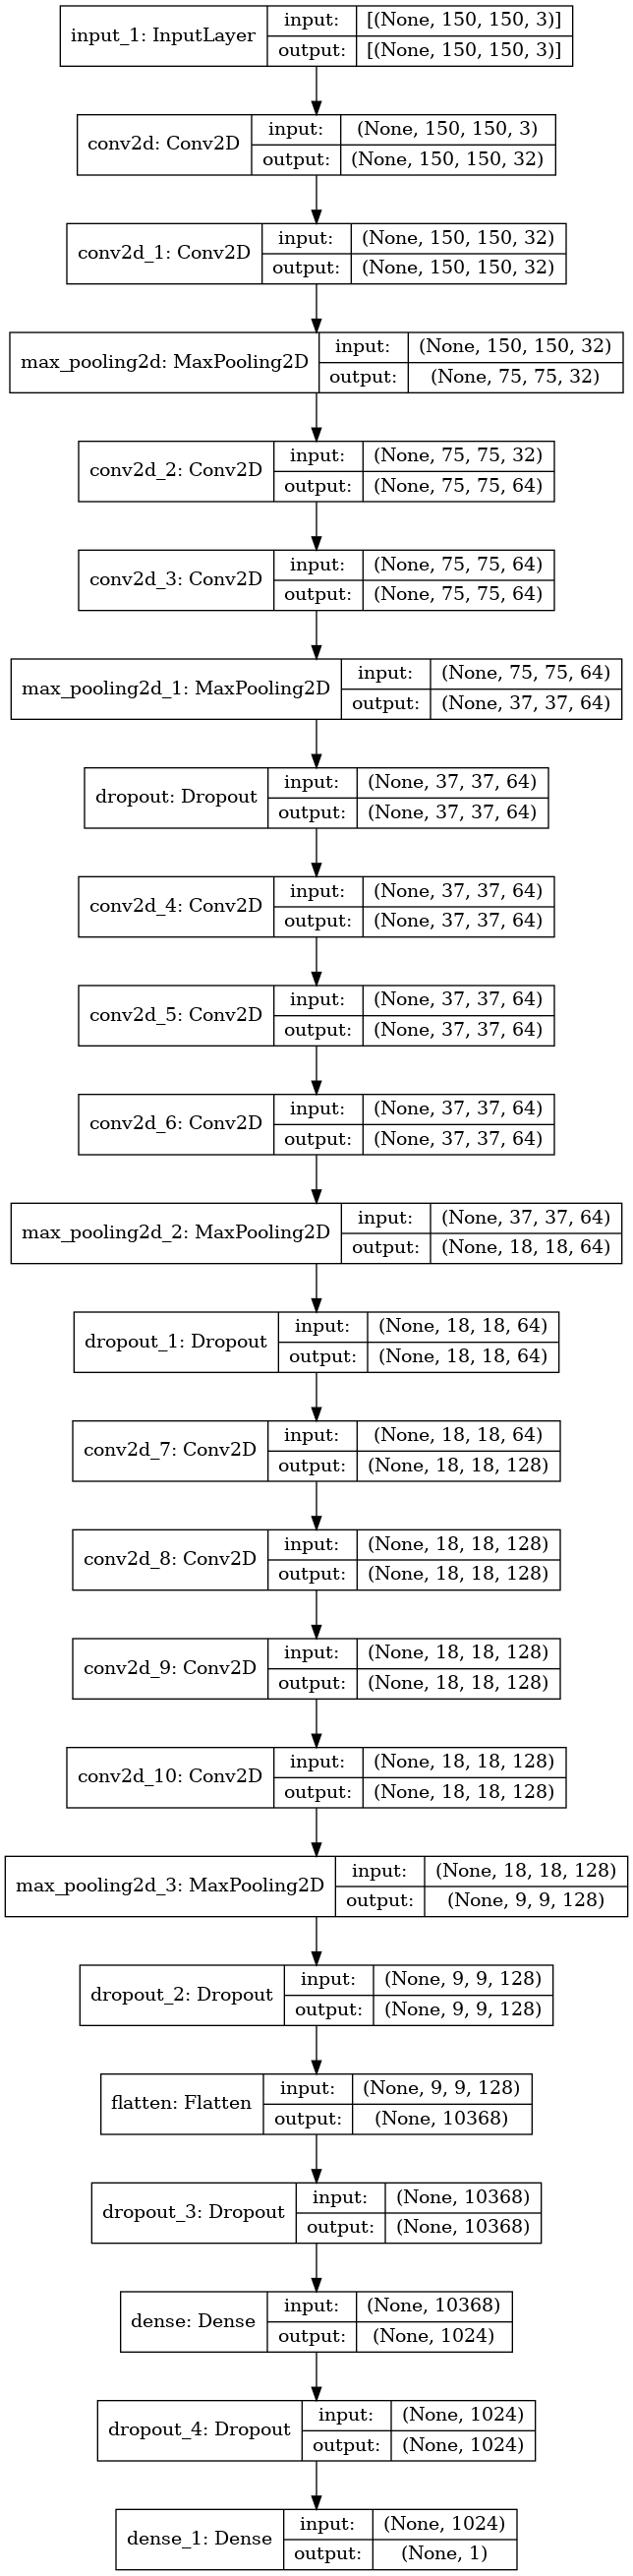

In [ ]:
plot_model(model_cnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# define training and validation step size
train_steps = train_dataset.n // BATCH_SIZE
val_steps = val_dataset.n // BATCH_SIZE

print("Train Step Size = " + str(train_steps) + ", Validation Step Size = " + str(val_steps))

Train Step Size = 100, Validation Step Size = 25


In [ ]:
training = model_cnn.fit(train_dataset, 
                         steps_per_epoch=train_steps, 
                         epochs=175, 
                         validation_data=val_dataset, 
                         validation_steps=val_steps)

Epoch 1/175


2021-11-11 12:52:31.002178: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-11 12:52:31.927281: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8204


100/100 [==============================] - 14s 112ms/step - loss: 0.7015 - accuracy: 0.5419 - val_loss: 0.7006 - val_accuracy: 0.5612
Epoch 2/175
100/100 [==============================] - 11s 111ms/step - loss: 0.6673 - accuracy: 0.5894 - val_loss: 0.6509 - val_accuracy: 0.6150
Epoch 3/175
100/100 [==============================] - 11s 111ms/step - loss: 0.6602 - accuracy: 0.6094 - val_loss: 0.6399 - val_accuracy: 0.6050
Epoch 4/175
100/100 [==============================] - 11s 111ms/step - loss: 0.6573 - accuracy: 0.6100 - val_loss: 0.6650 - val_accuracy: 0.6175
Epoch 5/175
100/100 [==============================] - 11s 111ms/step - loss: 0.6487 - accuracy: 0.6153 - val_loss: 0.5987 - val_accuracy: 0.6675
Epoch 6/175
100/100 [==============================] - 11s 110ms/step - loss: 0.6495 - accuracy: 0.6128 - val_loss: 0.5949 - val_accuracy: 0.6725
Epoch 7/175
100/100 [==============================] - 11s 110ms/step - loss: 0.6199 - accuracy: 0.6562 - val_loss: 0.5814 - val_accurac

Epoch 57/175
100/100 [==============================] - 11s 110ms/step - loss: 0.4327 - accuracy: 0.8016 - val_loss: 0.3961 - val_accuracy: 0.8263
Epoch 58/175
100/100 [==============================] - 11s 110ms/step - loss: 0.4375 - accuracy: 0.8003 - val_loss: 0.4190 - val_accuracy: 0.8163
Epoch 59/175
100/100 [==============================] - 11s 111ms/step - loss: 0.4287 - accuracy: 0.7969 - val_loss: 0.4765 - val_accuracy: 0.7925
Epoch 60/175
100/100 [==============================] - 11s 111ms/step - loss: 0.4351 - accuracy: 0.7956 - val_loss: 0.4072 - val_accuracy: 0.8313
Epoch 61/175
100/100 [==============================] - 11s 111ms/step - loss: 0.4146 - accuracy: 0.8087 - val_loss: 0.3900 - val_accuracy: 0.8275
Epoch 62/175
100/100 [==============================] - 11s 110ms/step - loss: 0.4184 - accuracy: 0.8106 - val_loss: 0.3769 - val_accuracy: 0.8350
Epoch 63/175
100/100 [==============================] - 11s 111ms/step - loss: 0.4179 - accuracy: 0.8019 - val_loss: 0

100/100 [==============================] - 11s 110ms/step - loss: 0.3185 - accuracy: 0.8591 - val_loss: 0.4179 - val_accuracy: 0.8338
Epoch 113/175
100/100 [==============================] - 11s 110ms/step - loss: 0.3092 - accuracy: 0.8656 - val_loss: 0.3918 - val_accuracy: 0.8500
Epoch 114/175
100/100 [==============================] - 11s 110ms/step - loss: 0.3017 - accuracy: 0.8672 - val_loss: 0.3277 - val_accuracy: 0.8737
Epoch 115/175
100/100 [==============================] - 11s 110ms/step - loss: 0.3085 - accuracy: 0.8634 - val_loss: 0.3108 - val_accuracy: 0.8625
Epoch 116/175
100/100 [==============================] - 11s 111ms/step - loss: 0.3042 - accuracy: 0.8659 - val_loss: 0.2930 - val_accuracy: 0.8800
Epoch 117/175
100/100 [==============================] - 11s 110ms/step - loss: 0.3181 - accuracy: 0.8572 - val_loss: 0.2922 - val_accuracy: 0.8788
Epoch 118/175
100/100 [==============================] - 11s 110ms/step - loss: 0.3207 - accuracy: 0.8625 - val_loss: 0.2980 -

100/100 [==============================] - 11s 110ms/step - loss: 0.2585 - accuracy: 0.8872 - val_loss: 0.2681 - val_accuracy: 0.8975
Epoch 168/175
100/100 [==============================] - 11s 111ms/step - loss: 0.2520 - accuracy: 0.8969 - val_loss: 0.2827 - val_accuracy: 0.8900
Epoch 169/175
100/100 [==============================] - 11s 110ms/step - loss: 0.2535 - accuracy: 0.8919 - val_loss: 0.2692 - val_accuracy: 0.8925
Epoch 170/175
100/100 [==============================] - 11s 110ms/step - loss: 0.2577 - accuracy: 0.8913 - val_loss: 0.2785 - val_accuracy: 0.8900
Epoch 171/175
100/100 [==============================] - 11s 110ms/step - loss: 0.2529 - accuracy: 0.8928 - val_loss: 0.2842 - val_accuracy: 0.8875
Epoch 172/175
100/100 [==============================] - 11s 110ms/step - loss: 0.2348 - accuracy: 0.9044 - val_loss: 0.2924 - val_accuracy: 0.8913
Epoch 173/175
100/100 [==============================] - 11s 111ms/step - loss: 0.2341 - accuracy: 0.8966 - val_loss: 0.2885 -

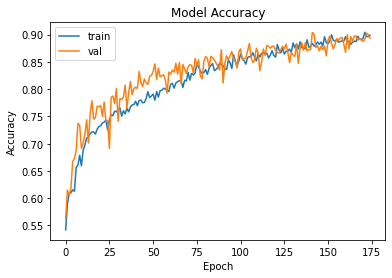

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

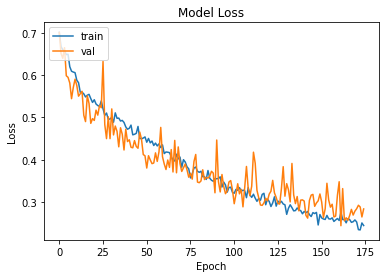

In [ ]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Generate submission file

In [ ]:
unsorted_submission = pd.DataFrame(columns=['id','label'])
unsorted_submission

,id,label


In [ ]:
test_label = []
count = 0
for filename in os.listdir(test_path):
  first_word = filename.split('.')[0]
  img = image.load_img(test_path + '/'+ filename, target_size = (150,150)) # load and resize image as 150x150
  Y = image.img_to_array(img) # convert image into a numpy array 
  X = np.expand_dims(Y,axis=0) # expand the dimension of that array
  val = model_cnn.predict(X)
  test_label.append(int(val))
  unsorted_submission = unsorted_submission.append({'id': int(first_word),'label': int(val)}, ignore_index=True)
  count += 1

print(test_label)

[0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 

In [ ]:
unsorted_submission
unsorted_submission.to_csv('/home/yucong/Documents/Data/unsorted_submission.csv')  

In [ ]:
submission = unsorted_submission.sort_values('id')
submission 

,id,label
142,1,1
232,2,1
412,3,1
88,4,1
268,5,1
...,...,...
227,496,0
484,497,0
211,498,0
79,499,1


In [ ]:
submission.to_csv('/home/yucong/Documents/Data/submission.csv') 

### Perform predictions
We take random images in the test set and compare it with the predictions obtained by the classifier

Predicted DOG


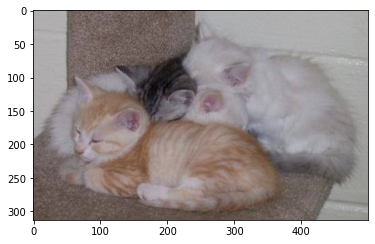

In [ ]:
img = load_img('/home/yucong/Documents/Data/test/1.jpg') 
imgplot = plt.imshow(img)
if submission.query('id==1')['label'].iloc[0] == 1:
    print("Predicted DOG")
else:
    print('Predicted CAT')

Predicted CAT


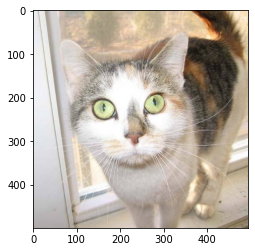

In [ ]:
img = load_img('/home/yucong/Documents/Data/test/25.jpg') 
imgplot = plt.imshow(img)
if submission.query('id==25')['label'].iloc[0] == 1:
    print("Predicted DOG")
else:
    print('Predicted CAT')

Predicted DOG


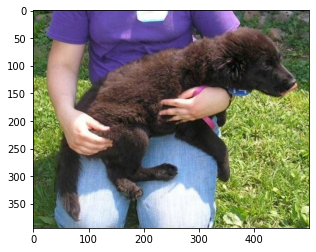

In [ ]:
img = load_img('/home/yucong/Documents/Data/test/50.jpg') 
imgplot = plt.imshow(img)
if submission.query('id==50')['label'].iloc[0] == 1:
    print("Predicted DOG")
else:
    print('Predicted CAT')

Predicted DOG


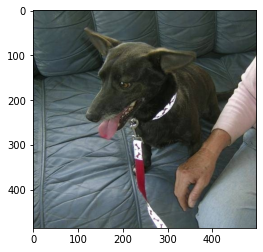

In [ ]:
img = load_img('/home/yucong/Documents/Data/test/75.jpg') 
imgplot = plt.imshow(img)
if submission.query('id==75')['label'].iloc[0] == 1:
    print("Predicted DOG")
else:
    print('Predicted CAT')

Predicted CAT


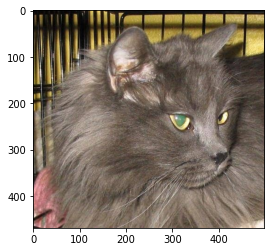

In [ ]:
img = load_img('/home/yucong/Documents/Data/test/99.jpg') 
imgplot = plt.imshow(img)
if submission.query('id==99')['label'].iloc[0] == 1:
    print("Predicted DOG")
else:
    print('Predicted CAT')

Predicted CAT


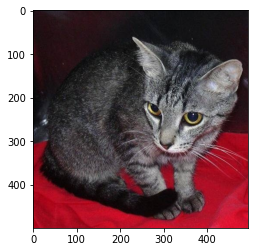

In [ ]:
img = load_img('/home/yucong/Documents/Data/test/125.jpg') 
imgplot = plt.imshow(img)
if submission.query('id==125')['label'].iloc[0] == 1:
    print("Predicted DOG")
else:
    print('Predicted CAT')

Predicted DOG


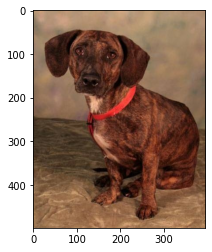

In [ ]:
img = load_img('/home/yucong/Documents/Data/test/150.jpg') 
imgplot = plt.imshow(img)
if submission.query('id==150')['label'].iloc[0] == 1:
    print("Predicted DOG")
else:
    print('Predicted CAT')

Predicted DOG


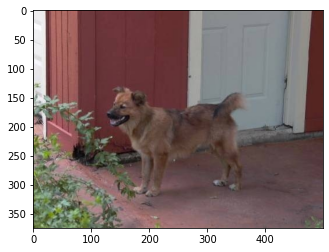

In [ ]:
img = load_img('/home/yucong/Documents/Data/test/175.jpg') 
imgplot = plt.imshow(img)
if submission.query('id==175')['label'].iloc[0] == 1:
    print("Predicted DOG")
else:
    print('Predicted CAT')

Predicted DOG


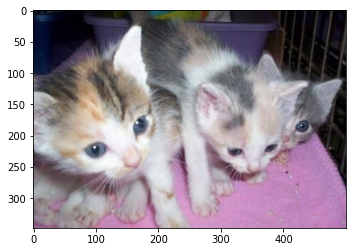

In [ ]:
img = load_img('/home/yucong/Documents/Data/test/200.jpg') 
imgplot = plt.imshow(img)
if submission.query('id==200')['label'].iloc[0] == 1:
    print("Predicted DOG")
else:
    print('Predicted CAT')

Predicted DOG


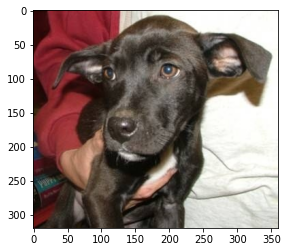

In [ ]:
img = load_img('/home/yucong/Documents/Data/test/225.jpg') 
imgplot = plt.imshow(img)
if submission.query('id==225')['label'].iloc[0] == 1:
    print("Predicted DOG")
else:
    print('Predicted CAT')

Predicted DOG


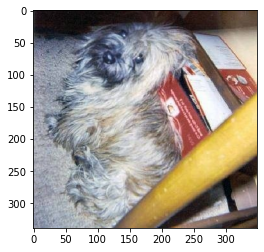

In [ ]:
img = load_img('/home/yucong/Documents/Data/test/250.jpg') 
imgplot = plt.imshow(img)
if submission.query('id==250')['label'].iloc[0] == 1:
    print("Predicted DOG")
else:
    print('Predicted CAT')

Predicted CAT


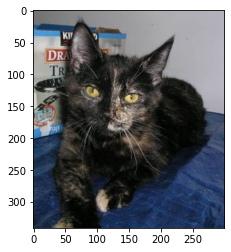

In [ ]:
img = load_img('/home/yucong/Documents/Data/test/275.jpg') 
imgplot = plt.imshow(img)
if submission.query('id==275')['label'].iloc[0] == 1:
    print("Predicted DOG")
else:
    print('Predicted CAT')

Predicted DOG


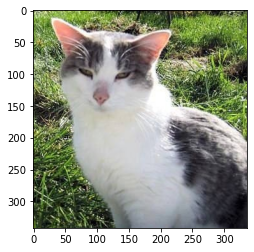

In [ ]:
img = load_img('/home/yucong/Documents/Data/test/300.jpg') 
imgplot = plt.imshow(img)
if submission.query('id==300')['label'].iloc[0] == 1:
    print("Predicted DOG")
else:
    print('Predicted CAT')

Predicted DOG


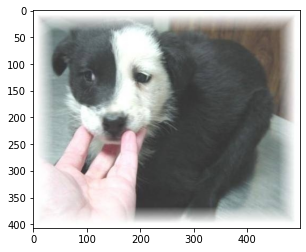

In [ ]:
img = load_img('/home/yucong/Documents/Data/test/325.jpg') 
imgplot = plt.imshow(img)
if submission.query('id==325')['label'].iloc[0] == 1:
    print("Predicted DOG")
else:
    print('Predicted CAT')

Predicted DOG


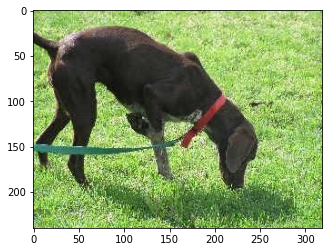

In [ ]:
img = load_img('/home/yucong/Documents/Data/test/350.jpg') 
imgplot = plt.imshow(img)
if submission.query('id==350')['label'].iloc[0] == 1:
    print("Predicted DOG")
else:
    print('Predicted CAT')

Predicted DOG


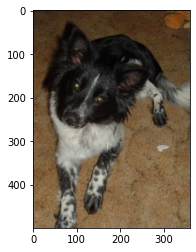

In [ ]:
img = load_img('/home/yucong/Documents/Data/test/375.jpg') 
imgplot = plt.imshow(img)
if submission.query('id==375')['label'].iloc[0] == 1:
    print("Predicted DOG")
else:
    print('Predicted CAT')

Predicted CAT


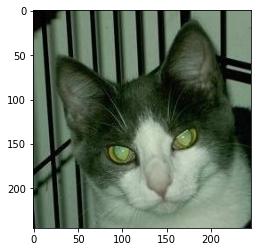

In [ ]:
img = load_img('/home/yucong/Documents/Data/test/400.jpg') 
imgplot = plt.imshow(img)
if submission.query('id==400')['label'].iloc[0] == 1:
    print("Predicted DOG")
else:
    print('Predicted CAT')

Predicted DOG


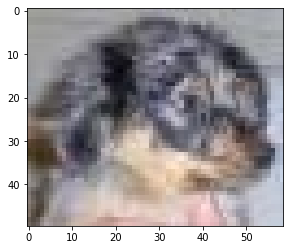

In [ ]:
img = load_img('/home/yucong/Documents/Data/test/425.jpg') 
imgplot = plt.imshow(img)
if submission.query('id==425')['label'].iloc[0] == 1:
    print("Predicted DOG")
else:
    print('Predicted CAT')

Predicted CAT


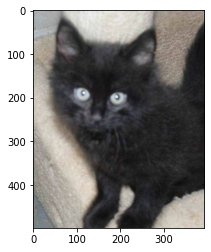

In [ ]:
img = load_img('/home/yucong/Documents/Data/test/450.jpg') 
imgplot = plt.imshow(img)
if submission.query('id==450')['label'].iloc[0] == 1:
    print("Predicted DOG")
else:
    print('Predicted CAT')

Predicted DOG


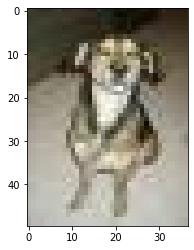

In [ ]:
img = load_img('/home/yucong/Documents/Data/test/495.jpg') 
imgplot = plt.imshow(img)
if submission.query('id==495')['label'].iloc[0] == 1:
    print("Predicted DOG")
else:
    print('Predicted CAT')

Predicted DOG


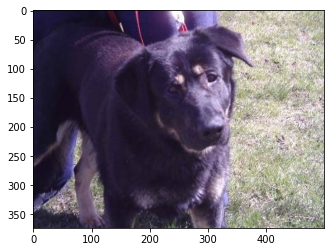

In [ ]:
img = load_img('/home/yucong/Documents/Data/test/500.jpg') 
imgplot = plt.imshow(img)
if submission.query('id==500')['label'].iloc[0] == 1:
    print("Predicted DOG")
else:
    print('Predicted CAT')

Predicted DOG


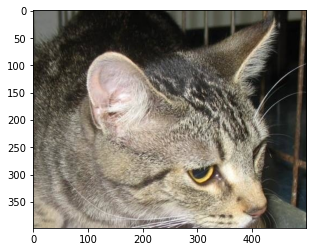

In [ ]:
img = load_img('/home/yucong/Documents/Data/test/290.jpg') 
imgplot = plt.imshow(img)
if submission.query('id==290')['label'].iloc[0] == 1:
    print("Predicted DOG")
else:
    print('Predicted CAT')

Predicted DOG


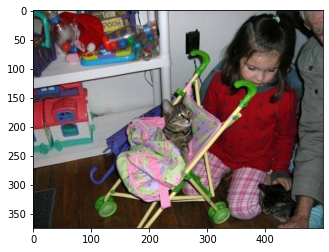

In [ ]:
img = load_img('/home/yucong/Documents/Data/test/293.jpg') 
imgplot = plt.imshow(img)
if submission.query('id==293')['label'].iloc[0] == 1:
    print("Predicted DOG")
else:
    print('Predicted CAT')